<a href="https://colab.research.google.com/github/rashmi1329/ECG_QML/blob/main/baseline_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Loaded data shape: (120, 5)
Columns: ['window_id', 'mean_hr', 'std_hr', 'rmssd', 'RR']
Linear Regression MAE = 1.32
Random Forest MAE     = 1.31


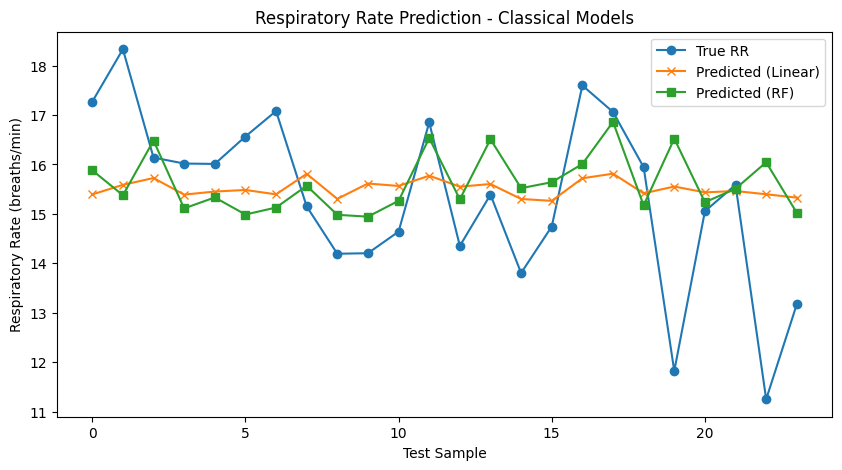

In [10]:
df = pd.read_csv("features_with_rr.csv").dropna()
# === Step 1: Train Classical Baseline Models ===

# Install required libraries (only needed once)
!pip install scikit-learn matplotlib pandas

# Import
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# 1. Load your dataset (adjust path if needed)
df = pd.read_csv("features_with_rr.csv").dropna()

# Check shape and columns
print("Loaded data shape:", df.shape)
print("Columns:", df.columns.tolist())

# 2. Define features (X) and label (y)
X = df[["mean_hr", "std_hr", "rmssd"]]   # <- the columns used for training
y = df["RR"]

# 3. Split into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Train Linear Regression model
lin = LinearRegression().fit(X_train, y_train)
y_pred_lin = lin.predict(X_test)
mae_lin = mean_absolute_error(y_test, y_pred_lin)

# 5. Train Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42).fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
mae_rf = mean_absolute_error(y_test, y_pred_rf)

# 6. Compare results
print(f"Linear Regression MAE = {mae_lin:.2f}")
print(f"Random Forest MAE     = {mae_rf:.2f}")

# 7. Plot predictions vs true RR
plt.figure(figsize=(10,5))
plt.plot(y_test.values, label="True RR", marker="o")
plt.plot(y_pred_lin, label="Predicted (Linear)", marker="x")
plt.plot(y_pred_rf, label="Predicted (RF)", marker="s")
plt.xlabel("Test Sample")
plt.ylabel("Respiratory Rate (breaths/min)")
plt.title("Respiratory Rate Prediction - Classical Models")
plt.legend()
plt.show()
